In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

In [156]:
data = pd.read_csv("Car Data.csv")
data

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco
...,...,...,...,...,...,...,...,...
1995,1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1996,1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1997,1998,Honda,Fit,2018,Gray,50000,14000,Atlanta
1998,1999,Ford,Fusion,2017,White,55000,19000,Phoenix


array([[<Axes: title={'center': 'Car ID'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

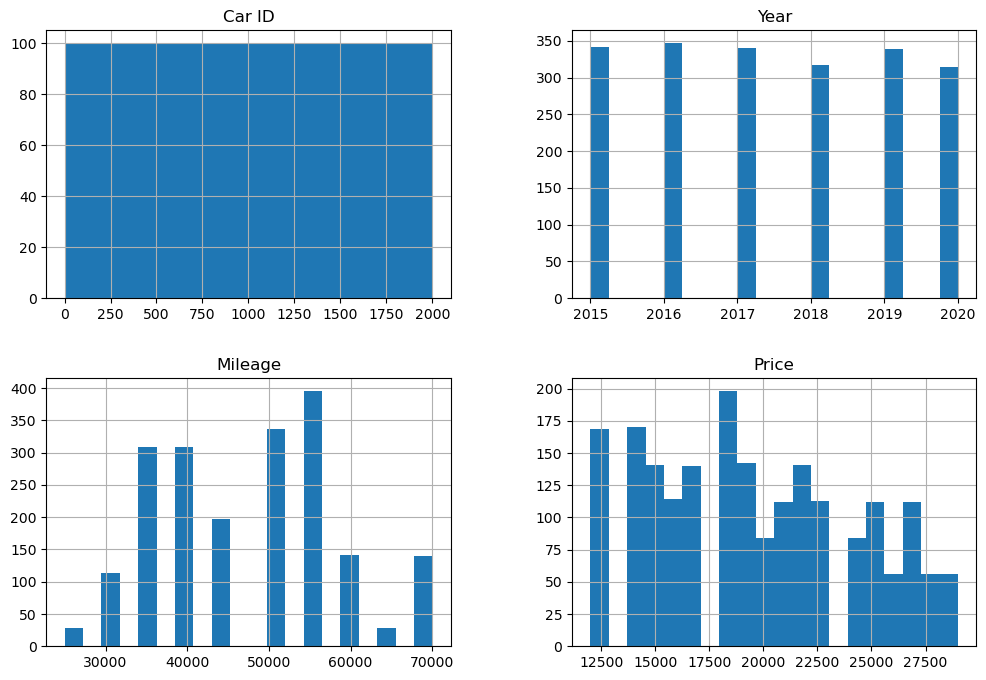

In [157]:
data.hist(bins=20,figsize=(12,8))

In [158]:
data.describe

<bound method NDFrame.describe of       Car ID      Brand     Model  Year   Color  Mileage  Price       Location
0          1     Toyota     Camry  2018   White    45000  18000    Los Angeles
1          2      Honda     Civic  2019    Blue    35000  16000       New York
2          3       Ford     Focus  2017  Silver    55000  14000        Chicago
3          4  Chevrolet     Cruze  2016     Red    60000  12000          Miami
4          5    Hyundai   Elantra  2018   Black    40000  15000  San Francisco
...      ...        ...       ...   ...     ...      ...    ...            ...
1995    1996    Hyundai  Palisade  2019  Silver    65000  22000  San Francisco
1996    1997     Toyota    Sienna  2018     Red    55000  16000         Dallas
1997    1998      Honda       Fit  2018    Gray    50000  14000        Atlanta
1998    1999       Ford    Fusion  2017   White    55000  19000        Phoenix
1999    2000  Chevrolet    Malibu  2016    Blue    30000  23000        Houston

[2000 rows x 8 co

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car ID    2000 non-null   int64 
 1   Brand     2000 non-null   object
 2   Model     2000 non-null   object
 3   Year      2000 non-null   int64 
 4   Color     2000 non-null   object
 5   Mileage   2000 non-null   int64 
 6   Price     2000 non-null   int64 
 7   Location  2000 non-null   object
dtypes: int64(4), object(4)
memory usage: 125.1+ KB


In [160]:
data.isnull().sum()

Car ID      0
Brand       0
Model       0
Year        0
Color       0
Mileage     0
Price       0
Location    0
dtype: int64

In [161]:
data["Brand"].value_counts()

Brand
Toyota       438
Honda        411
Ford         384
Chevrolet    384
Hyundai      383
Name: count, dtype: int64

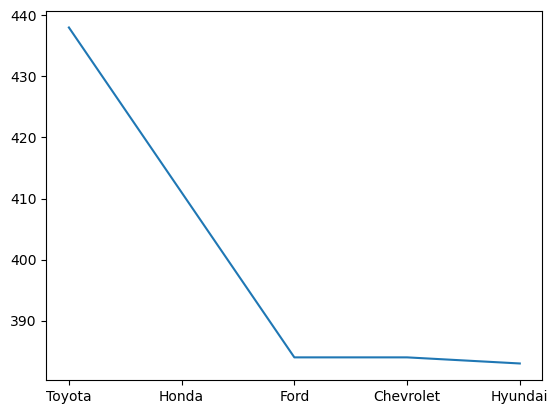

In [162]:
plt.plot(data["Brand"].value_counts())

In [163]:
data["Model"].value_counts()

Model
Civic     109
Fusion     82
Camry      82
Cruze      55
Pilot      55
         ... 
Rav7        2
Rav6        2
Rav5        2
Rav4        2
Rav31       1
Name: count, Length: 68, dtype: int64

In [164]:
data["Mileage"]

0       45000
1       35000
2       55000
3       60000
4       40000
        ...  
1995    65000
1996    55000
1997    50000
1998    55000
1999    30000
Name: Mileage, Length: 2000, dtype: int64

In [165]:
data["Price"]

0       18000
1       16000
2       14000
3       12000
4       15000
        ...  
1995    22000
1996    16000
1997    14000
1998    19000
1999    23000
Name: Price, Length: 2000, dtype: int64

In [166]:
data = data.drop(columns="Car ID")

In [167]:
data.columns

Index(['Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price', 'Location'], dtype='object')

In [168]:
le = LabelEncoder()

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     2000 non-null   object
 1   Model     2000 non-null   object
 2   Year      2000 non-null   int64 
 3   Color     2000 non-null   object
 4   Mileage   2000 non-null   int64 
 5   Price     2000 non-null   int64 
 6   Location  2000 non-null   object
dtypes: int64(3), object(4)
memory usage: 109.5+ KB


In [170]:
# applying one hot encoder to the object types
data["Brand"] = le.fit_transform(data["Brand"])
data["Model"] = le.fit_transform(data["Model"])
data["Color"] = le.fit_transform(data["Color"])
data["Location"] = le.fit_transform(data["Location"])

In [171]:
X = data.drop(columns='Price')
y = data["Price"]

In [172]:
scaler = StandardScaler()

In [173]:
X = scaler.fit_transform(X)


In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [175]:
model = AdaBoostRegressor(learning_rate=0.001,loss='square',n_estimators=20)

In [176]:
model.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.001, loss='square', n_estimators=20)

In [177]:
y_pred = model.predict(X_test)

In [178]:
mae = mean_absolute_error(y_pred,y_test)
mae

3753.7892259781706